In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the data
train=pd.read_csv("train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# checking the percentage of missing values in each variable
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
train.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
# remove the variables having more than 20% missing variables
# saving missing values in a variable
a = train.isnull().sum()/len(train)*100
# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])

In [7]:
variable

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

We need to calculate the variance of each variable we are given. Then drop the variables having low variance as compared to other variables in our dataset. The reason for doing this, as I mentioned above, is that variables with a low variance will not affect the target variable.

In [8]:
# Missing Value imputation
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [9]:
train.isnull().sum()/len(train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [10]:
# Variance calculation
train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

As the above output shows, the variance of Item_Visibility is very less as compared to the other variables. We can safely drop this column

In [13]:
numeric = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
var = numeric.var()
numeric = numeric.columns
variable = []
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(numeric[i])


In [14]:
variable

['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']

### High Correlation Filter

High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some model.
We should keep those variables which show a decent or high correlation with the target variable

In [16]:
df=train.drop('Item_Outlet_Sales', 1)
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


we don't have any corre;ated variables in our dataset

### Random Forest
Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features.

 Let’s also drop the ID variables (Item_Identifier and Outlet_Identifier) as these are just unique numbers and hold no significant importance for us currently.

In [17]:
# One hot encoding
from sklearn.ensemble import RandomForestRegressor
df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.Item_Outlet_Sales)

RandomForestRegressor(max_depth=10, random_state=1)

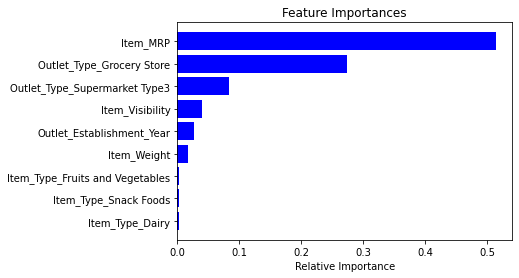

In [18]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

we can use the SelectFromModel of sklearn to do so. It selects the features based on the importance of their weights.

In [25]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df, train.Item_Outlet_Sales)
feature

SelectFromModel(estimator=RandomForestRegressor(max_depth=10, random_state=1))

### Backward feature elimination

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10)

rfe = rfe.fit_transform(df, train.Item_Outlet_Sales)

### Forward feature elimination

In [27]:
from sklearn.feature_selection import f_regression
ffs = f_regression(df,train.Item_Outlet_Sales)

In [28]:
variable = [ ]
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=10:
        variable.append(df.columns[i])

In [29]:
variable

['Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Type_Baking Goods',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2']

This gives us the top most variables based on the forward feature selection algorithm.

Both Backward Feature Elimination and Forward Feature Selection are time consuming and computationally expensive.They are practically only used on datasets that have a small number of input variables.

## Factor analysis

In [32]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
images = [cv2.imread(file) for file in glob('train_/train/*.png')]

In [33]:
images = np.array(images)
images.shape

(60000, 28, 28, 3)

As you can see above, it’s a 3-dimensional array. We must convert it to 1-dimension as all the upcoming techniques only take 1-dimensional input. To do this, we need to flatten the images:

In [34]:
image = []
for i in range(0,60000):
    img = images[i].flatten()
    image.append(img)
image = np.array(image)

In [36]:
train = pd.read_csv("train_/train.csv")     # Give the complete path of your train.csv file
feat_cols = [ 'pixel'+str(i) for i in range(image.shape[1]) ]
df = pd.DataFrame(image,columns=feat_cols)
df['label'] = train['label']

we will decompose the dataset using Factor Analysis:

In [37]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(df[feat_cols].values)

Here, n_components will decide the number of factors in the transformed data.

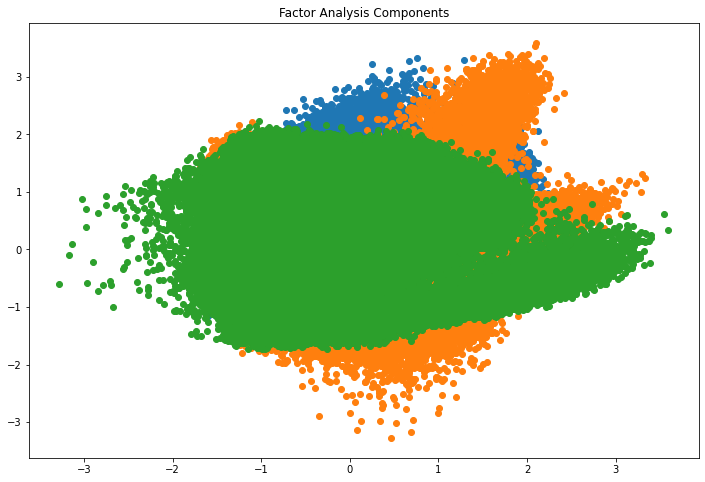

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

It is hard to observe these factors individually but we have been able to reduce the dimensions of our data successfully.

## Principal Component Analysis (PCA)

PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. These newly extracted variables are called Principal Components.

Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset.
Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component.
Third principal component tries to explain the variance which is not explained by the first two principal components and so on

Let's randomly plot some of the images from our dataset

<Figure size 432x288 with 0 Axes>

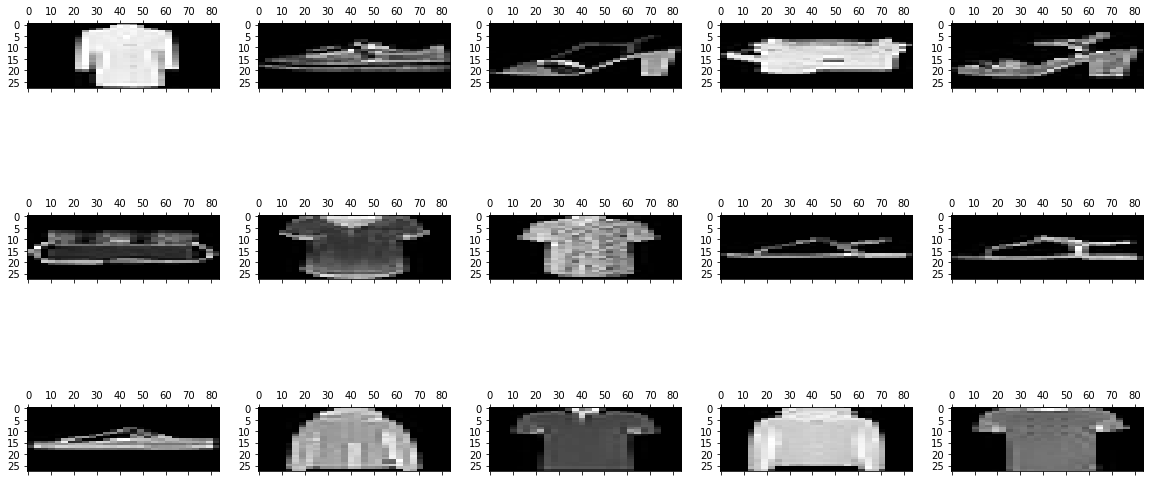

In [44]:
rndperm = np.random.permutation(df.shape[0])
plt.gray()
fig = plt.figure(figsize=(20,10))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28*3)).astype(float))


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feat_cols].values)

In this case, n_components will decide the number of principal components in the transformed data. Let’s visualize how much variance has been explained using these 4 components. We will use explained_variance_ratio_ to calculate the same.

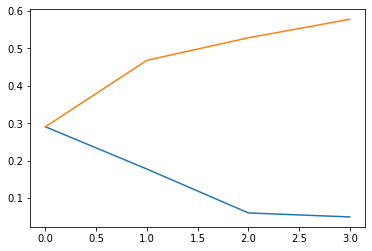

In [47]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))


In the above graph, the blue line represents `component-wise explained variance` while the orange line represents the `cumulative explained variance`. We are able to explain around `60% variance` in the dataset using just four components. Let us now try to visualize each of these decomposed components:

Text(0.5, 0.98, '4-Component PCA')

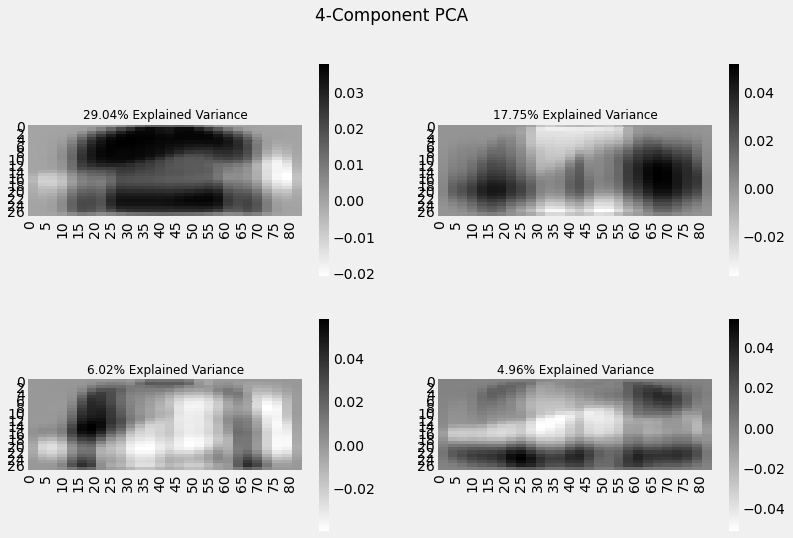

In [51]:
import seaborn as sns
plt.style.use('fivethirtyeight')
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.heatmap(pca.components_[0, :].reshape(28, 84), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 84), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 84), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 84), ax=axarr[1][1], cmap='gray_r')
axarr[0][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
fontsize=12
)
axarr[0][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
fontsize=12
)
axarr[1][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
fontsize=12
)
axarr[1][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

We can also use `Singular Value Decomposition (SVD)` to decompose our original dataset into its constituents, resulting in dimensionality reduction.

SVD decomposes the original variables into three constituent matrices. It is essentially used to remove redundant features from the dataset. It uses the concept of Eigenvalues and Eigenvectors to determine those three matrices. We will not go into the mathematics of it due to the scope of this article, but let’s stick to our plan, i.e. reducing the dimensions in our dataset.

In [52]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df[feat_cols].values)

Let us visualize the transformed variables by plotting the first two principal components:

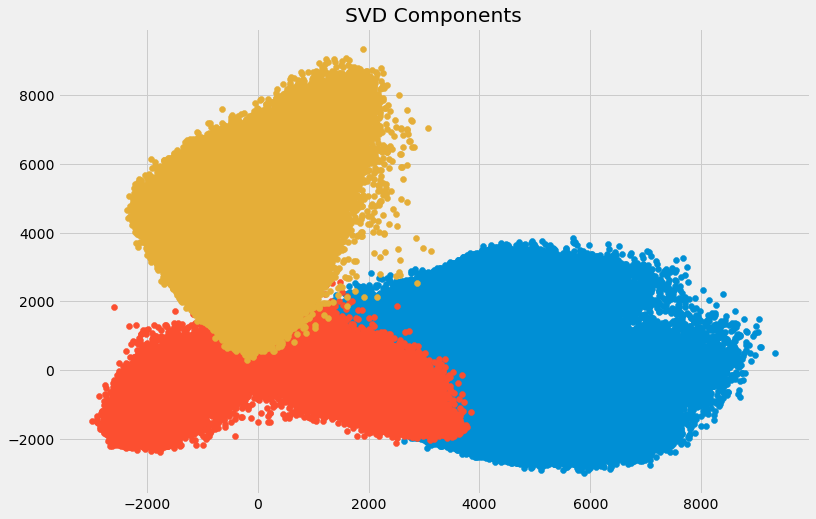

In [53]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

### Independent Component Analysis

Independent Component Analysis (ICA) is based on information-theory and is also one of the most widely used dimensionality reduction techniques. The major difference between PCA and ICA is that PCA looks for uncorrelated factors while ICA looks for independent factors.

If two variables are uncorrelated, it means there is no linear relation between them. If they are independent, it means they are not dependent on other variables

This algorithm assumes that the given variables are linear mixtures of some unknown latent variables. It also assumes that these latent variables are mutually independent, i.e., they are not dependent on other variables and hence they are called the independent components of the observed data.

In [54]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(df[feat_cols].values)

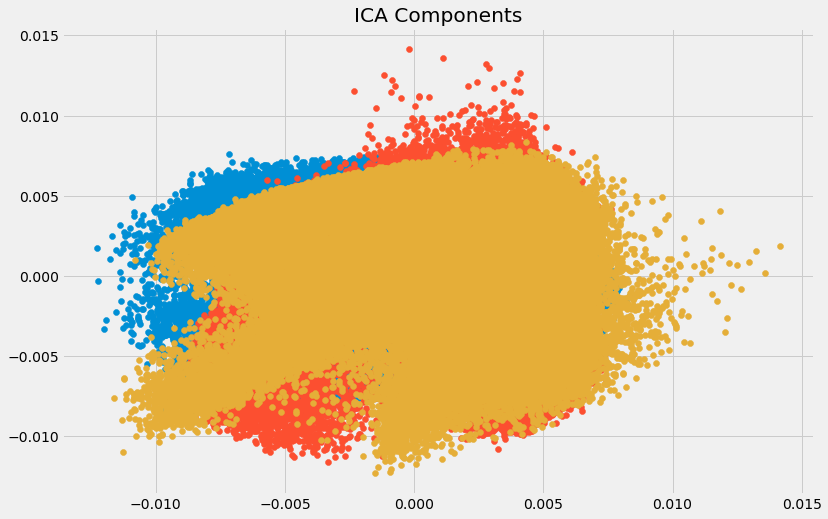

In [56]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,1], X[:,2])
plt.scatter(X[:,2], X[:,0])

### Methods based on Projection

### t-SNE

### UMAP